FRUIT CLASSIFICATION OF DIFFERENT TYPES OF APPLES

In [16]:
#import necessary libraries
import splitfolders
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,BatchNormalization,GlobalAveragePooling2D,Dropout
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
print(tf.__version__)

2.3.1


In [3]:
input_folder="Downloads/FRUIT/input_dataset"
output="Downloads/FRUIT/processed_data"
splitfolders.ratio(input_folder,output,seed=42,ratio=(.6,.2,.2))

Copying files: 5732 files [01:45, 54.57 files/s] 


In [4]:
img_height,img_width=(224,224)
batch_size=32
train_data_dir="Downloads/FRUIT/processed_data/train"
valid_data_dir="Downloads/FRUIT/processed_data/val"
test_data_dir="Downloads/FRUIT/processed_data/test"

In [19]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
     zoom_range=0.50,
     rotation_range=45,
    horizontal_flip=True,
     width_shift_range=0.15,
 height_shift_range=0.15,
    validation_split=0.2)
train_generator=datagen.flow_from_directory(
train_data_dir,#Target directory
target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training')#set as traing data
valid_generator=datagen.flow_from_directory(
    valid_data_dir,#same directory as training data
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation')#set as validation data

Found 2752 images belonging to 12 classes.
Found 223 images belonging to 12 classes.


In [10]:
valid_generator=datagen.flow_from_directory(
    valid_data_dir,#same directory as training data
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')#set as validation data

Found 223 images belonging to 12 classes.


In [11]:
def plotImages(img_arr):
    fig,axes = plt.subplots(1, 5,  figsize = (25, 25))
    axes = axes.flatten()
    for img, ax in zip(img_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

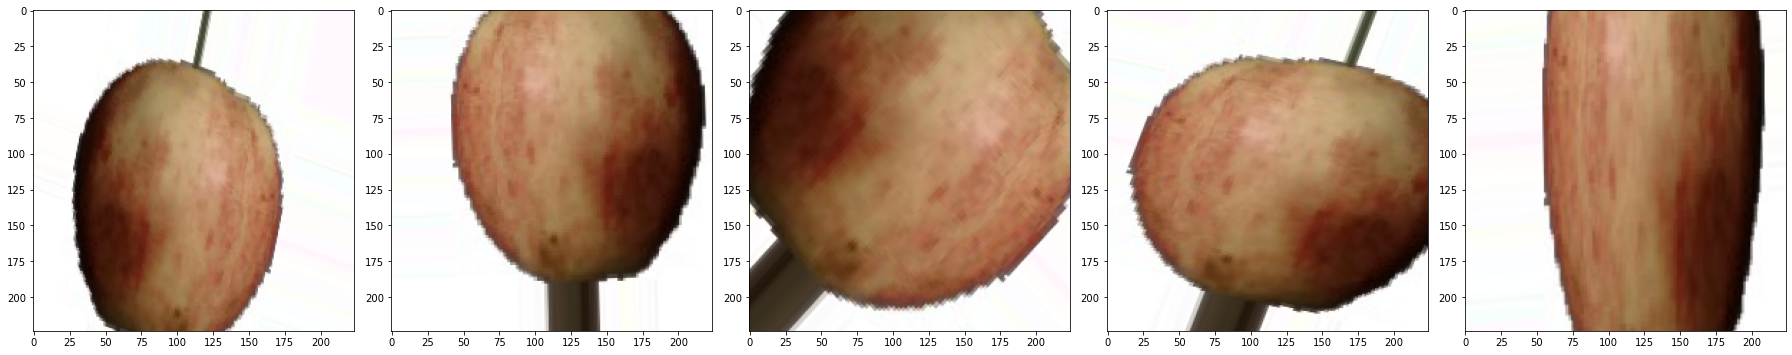

In [12]:
#plot a few train images
img_array = [train_generator[0][0][0] for i in range(12)]
plotImages(img_array)

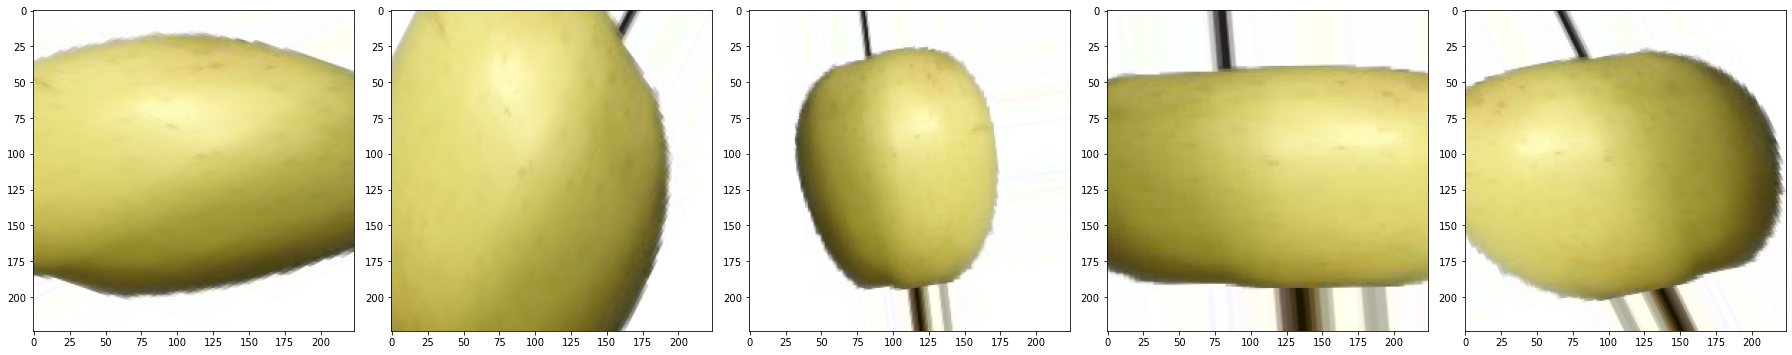

In [25]:
# plot a few val images
img_array  = [valid_generator[0][0][0] for i in range(12)]
plotImages(img_array)

In [22]:
# Model

model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(12, activation="softmax"))

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 43264)            

In [23]:
EPOCHS=10
history = model.fit_generator(train_generator, epochs=EPOCHS, validation_data=valid_generator)


Epoch 1/10
86/86 [==============================] - 210s 2s/step - loss: 1.8334 - accuracy: 0.3383 - val_loss: 1.2848 - val_accuracy: 0.5740
Epoch 2/10
86/86 [==============================] - 182s 2s/step - loss: 1.0072 - accuracy: 0.6334 - val_loss: 1.1721 - val_accuracy: 0.5471
Epoch 3/10
86/86 [==============================] - 178s 2s/step - loss: 0.6237 - accuracy: 0.7700 - val_loss: 0.9265 - val_accuracy: 0.7085
Epoch 4/10
86/86 [==============================] - 180s 2s/step - loss: 0.5169 - accuracy: 0.8125 - val_loss: 0.7557 - val_accuracy: 0.7220
Epoch 5/10
86/86 [==============================] - 189s 2s/step - loss: 0.4160 - accuracy: 0.8517 - val_loss: 0.8996 - val_accuracy: 0.7578
Epoch 6/10
86/86 [==============================] - 172s 2s/step - loss: 0.3040 - accuracy: 0.8957 - val_loss: 0.7935 - val_accuracy: 0.8117
Epoch 7/10
86/86 [==============================] - 171s 2s/step - loss: 0.2743 - accuracy: 0.9023 - val_loss: 0.6600 - val_accuracy: 0.8430
Epoch 8/10
86

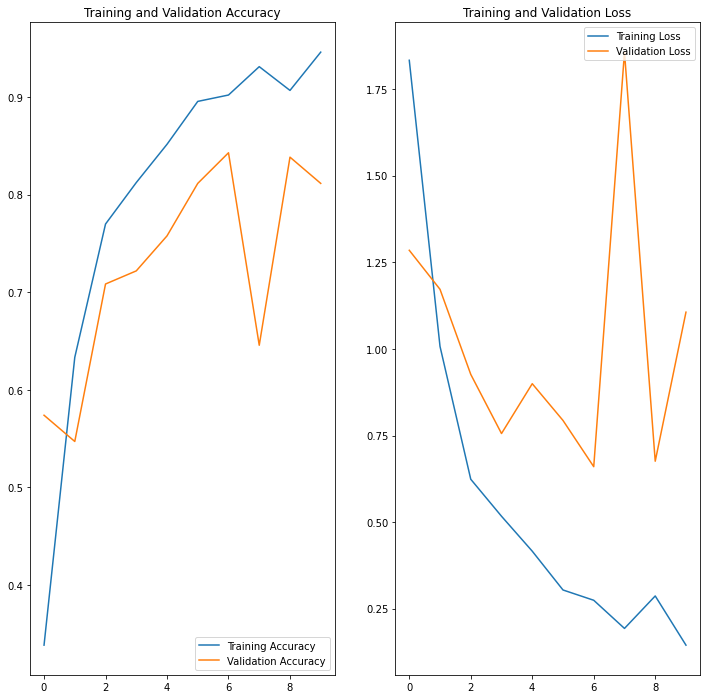

In [26]:
# Plot training and validation graphs
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_accuracy,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [27]:
# Save the model TFLite
export_dir = 'saved_model/1'

tf.saved_model.save(model, export_dir)


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/1\assets


In [30]:
# Model optmization and conversion 
#@title Select mode of optimization
mode = "Default" #@param ["Default", "Storage", "Speed"]

if mode == 'Storage':
  optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
  optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
  optimization = tf.lite.Optimize.DEFAULT
  
optimization

<Optimize.DEFAULT: 'DEFAULT'>

In [31]:
# Convert saved model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.optimizations = [optimization]
tflite_model = converter.convert()

In [33]:
# Save the converted model tflite file
tflite_model_file = 'model.tflite'

with open(tflite_model_file, 'wb') as f:
    f.write(tflite_model)

with open('labels.txt', 'w') as f:
  f.write('\n'.join(input_folder))



In [34]:
# Test the TFLITE model
interpretor = tf.lite.Interpreter(model_content=tflite_model)
interpretor.allocate_tensors()

#details
input_index = interpretor.get_input_details()[0]["index"]
output_index = interpretor.get_output_details()[0]["index"]

In [35]:
def get_label(file_path):
  parts = tf.strings.split(file_path, os.path.sep)
  return parts[-2] == input_folder

def decode_img(img):
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

def process_path(file_path):
  label = get_label(file_path)
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [36]:
test_batches = tf.data.Dataset.list_files(str(output/'train/*/*'))

test_batches = test_batches.map(process_path).batch(1).prefetch(1)

for img, label in test_batches.take(15):
  interpretor.set_tensor(input_index, img)
  interpretor.invoke()
  predict = interpretor.get_tensor(output_index)
  print("Predicted: {} - {:2.0f}% : True: {}".format(input_folder[np.argmax(predict)],
                                                     100*np.max(predict),
                                                     input_folder[label[0].numpy()==1]))


TypeError: unsupported operand type(s) for /: 'str' and 'str'